In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [17]:
observation = 1000
xs=np.random.uniform(low=-10, high=10, size=(observation,1))
zs=np.random.uniform(-10,10, size=(observation,1))

generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(observation,1))
generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF Intro', inputs=generated_inputs, targets=generated_targets)

In [18]:
input_size=2
output_size=1
inputs=tf.placeholder(tf.float32, shape=[None, input_size])
targets=tf.placeholder(tf.float32, shape=[None, output_size])

weight=tf.Variable(tf.random_uniform([input_size,output_size], minval=-0.1, maxval=0.1))
biases=tf.Variable(tf.random_uniform([output_size]))

output=tf.matmul(inputs,weight) + biases

mean_loss=tf.losses.mean_squared_error(labels=targets,predictions=output)/2.
optimizer=tf.train.GradientDescentOptimizer(0.5).minimize(mean_loss)

In [19]:
sess=tf.InteractiveSession()
initializer=tf.global_variables_initializer()
sess.run(initializer)
training_data=np.load('TF Intro.npz')
for e in range(100):
    _, curr_loss=sess.run([optimizer,mean_loss],
                         feed_dict={inputs:training_data['inputs'], targets:training_data['targets']})
    print(curr_loss)

C:\Users\codehax\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


218.16638
54669.223
14326401.0
3764366800.0
991604500000.0
261832450000000.0
6.9293314e+16
1.8377473e+19
4.8837113e+21
1.3002493e+24
3.467849e+26
9.263943e+28
2.4784546e+31
6.6399526e+33
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


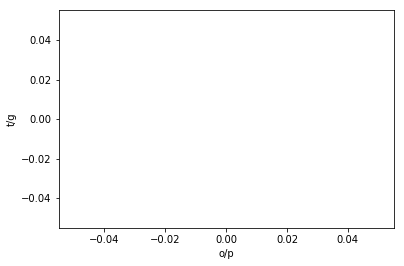

In [21]:
out=sess.run([output],
             feed_dict={inputs:training_data['inputs']})
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('o/p')
plt.ylabel('t/g')
plt.show()